In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, TopKPooling, SAGPooling, ASAPooling, EdgePooling
from torch_geometric.data import Data
import os
import h5py
import torch.utils.data as data
from sklearn import preprocessing
import numpy as np
from tqdm.notebook import tqdm
base = 'data/modelnet/modelnet_graph_k15/'
paths = []
labels = []
for obj in os.listdir(base):
    temp = base + obj
    for file in os.listdir(temp):
        if obj in ['sofa', 'airplane', 'vase', 'chair', 'toilet', 'bookshelf', 'bed', 'monitor', 'piano', 'bottle']:
            paths.append(temp+'/' + file)
            labels.append(obj)

In [2]:
from src import point_train
from src import pointnet_model
from src import pointnet_data

In [3]:
dataset = pointnet_data.Pointdata(paths, labels)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [4000, 862])

In [7]:
model = pointnet_model.PointNet()
opts = {
    'lr': 1e-4,
    'epochs': 30,
    'batch_size': 64
}

Train = point_train.Trainer(model = model,
                      train_set = train_dataset,
                      test_set = test_dataset,opts = opts)

Train.train()

PointNet(
  (input): Sequential(
    (0): Conv1d(3, 64, kernel_size=(1,), stride=(1,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (mlp_first): Sequential(
    (0): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (mlp_second): Sequential(
    (0): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv1d(128, 200, kernel_size=(1,), stride=(1,))
    (4): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (mlp_third): Sequential(
    (0): Conv1d(200, 128, kernel_size=(1,), stride=(1,))
    (1): ReLU()
    (2): Conv1d(128, 10, kernel_size=(1,), stride=(1,))
    (3): ReLU()
  )
)


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 1, train loss: 2.133803668476286, test loss: 1.986382816519056, test accuracy: 0.38906250000000003


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 2, train loss: 1.841920710745312, test loss: 1.6857669268335616, test accuracy: 0.45215773809523807


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 3, train loss: 1.6176300162360782, test loss: 1.5293708188193185, test accuracy: 0.5382440476190476


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 4, train loss: 1.4922912272195967, test loss: 1.4424589276313782, test accuracy: 0.5570684523809524


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 5, train loss: 1.4085654171686324, test loss: 1.3903981021472387, test accuracy: 0.5967261904761905


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 6, train loss: 1.3538330452782767, test loss: 1.345202671630042, test accuracy: 0.6142857142857142


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 7, train loss: 1.3243392176098294, test loss: 1.3064969309738703, test accuracy: 0.6283482142857143


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 8, train loss: 1.2874759530264235, test loss: 1.2766561252730233, test accuracy: 0.6327380952380952


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 9, train loss: 1.2544299231635199, test loss: 1.2439821745668138, test accuracy: 0.6517113095238095


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 10, train loss: 1.2369530342874073, test loss: 1.2307426844324385, test accuracy: 0.6558779761904762


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 11, train loss: 1.218830851335374, test loss: 1.200749546289444, test accuracy: 0.6641369047619048


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 12, train loss: 1.201495110988617, test loss: 1.1968717404774256, test accuracy: 0.6557291666666666


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 13, train loss: 1.1875087136314029, test loss: 1.174938874585288, test accuracy: 0.6633928571428571


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 14, train loss: 1.1779098245832655, test loss: 1.1719745695590973, test accuracy: 0.6700892857142857


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 15, train loss: 1.1739731913521176, test loss: 1.1817634786878313, test accuracy: 0.6610119047619047


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 16, train loss: 1.1642463831674486, test loss: 1.1711285838059016, test accuracy: 0.6611607142857142


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 17, train loss: 1.1501236132213049, test loss: 1.1317485996655055, test accuracy: 0.6834077380952381


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 18, train loss: 1.1457770816863528, test loss: 1.150651821068355, test accuracy: 0.6713541666666666


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 19, train loss: 1.1357242502863445, test loss: 1.1505478450230189, test accuracy: 0.6772321428571428


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 20, train loss: 1.1369095719049847, test loss: 1.1319227048328944, test accuracy: 0.6726190476190476


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 21, train loss: 1.123424197946276, test loss: 1.1344423592090607, test accuracy: 0.6678571428571428


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 22, train loss: 1.1164321341211834, test loss: 1.1068913383143288, test accuracy: 0.6810267857142858


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 23, train loss: 1.1110019295934648, test loss: 1.1246807660375322, test accuracy: 0.6766369047619047


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 24, train loss: 1.1061920788553026, test loss: 1.1188577626432692, test accuracy: 0.673139880952381


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 25, train loss: 1.1096512779356942, test loss: 1.1186594111578805, test accuracy: 0.6723214285714285


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 26, train loss: 1.1064568994537232, test loss: 1.0986436562878745, test accuracy: 0.6851934523809523


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 27, train loss: 1.0931507831528073, test loss: 1.097521300826754, test accuracy: 0.6828124999999999


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 28, train loss: 1.097934001021915, test loss: 1.1122748766626631, test accuracy: 0.6828124999999999


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 29, train loss: 1.094071268089234, test loss: 1.0959675993238176, test accuracy: 0.6816964285714285


  0%|          | 0/63 [00:00<?, ?it/s]

epoch: 30, train loss: 1.0860989264079504, test loss: 1.104323766061238, test accuracy: 0.6804315476190476


In [14]:
torch.save(model, 'trained_models/pointnet.pt')

In [8]:
result = Train.get_stats()
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

epoch = [x[0] for x in result]
train_ls = [x[1] for x in result]
test_ls = [x[2] for x in result]
test_acc = [x[3] for x in result]

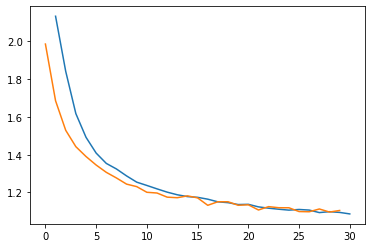

In [9]:
plt.plot(epoch, train_ls, test_ls)

Text(0.5, 1.0, 'Best PointNet')

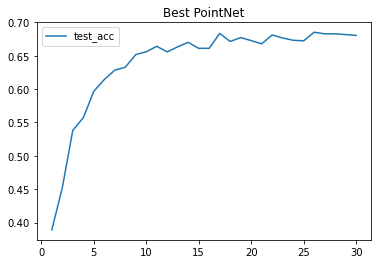

In [13]:
plt.plot(epoch, test_acc, label='test_acc')
plt.legend()
plt.title('Best PointNet')